# DEA - New Data 2016/2023 

In [3]:
import pandas as pd 
import numpy as np
from dealib import dea
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

data = pd.read_excel('Data.xlsx', sheet_name = 'Fact_Academy')
data = data[data.Year.isin([2016, 2023])].reset_index(drop = True)
data_original = data.copy()
print(data.shape)
data.head(3)

(32, 14)


,Institution_YearCode,Year,Students,StudentsB.S,StudentsPhd,StudentsM.S,First_Year_Students,StudentsB.S.c_Engineering,StudentsM.S.c_Engineering,StudentsP.H.D_Engineering,Number_of_Degree_Recipients,Number_of_Bachelor's_Degree_Recipients,Number_of_Master's_Degree_Recipients,Number_of_Doctorate_Degree_Recipients
0,712023,2023,1624,1583,0,41.0,450,1535,11,0,266,229,37,0
1,12016,2016,20171,11573,2224,6209.0,4720,327,3,7,5402,2888,2148,278
2,392023,2023,3089,2929,0,160.0,750,1441,85,0,631,555,76,0


## Inputs

In [4]:
def data_expense(column_name, expanse_code):
    ''' 
    Return all differents expenses data (or income if expanse_code = 5). 
    '''
    expenses = pd.read_excel('Data.xlsx', sheet_name = 'Expanses_Orederd1')
    expenses = expenses[(expenses.Expanse_Code == expanse_code) & (expenses.Year.isin([2016, 2023]))].drop('Expanse_Code', axis = 1)
    expenses = expenses.rename(columns = {'Amount': column_name}).reset_index(drop = True)
    return expenses


def data_staff(column_name, staff_code):
    ''' 
    Return all differents staff data. 
    '''
    staff = pd.read_excel('Data.xlsx', sheet_name = 'Staff_Oredered1')
    staff = staff[(staff.Staff_Type == staff_code) & (staff.Year.isin([2016, 2023]))].drop('Staff_Type', axis = 1)
    staff = staff.rename(columns = {'Staff_Amount': column_name}).reset_index(drop = True)
    return staff

#### Expenses Data
# Total Expenses
total_expenses = data_expense(column_name = 'Total_Expenses', expanse_code = 1)
# Teaching and Research Expenses
teaching_reseach_expenses = data_expense(column_name = 'Teaching&Research_Expenses', expanse_code = 2)
# Marketing Expenses
marketing_expenses = data_expense(column_name = 'Marketing_Expenses', expanse_code = 4)
# Salary Expenses
salary_expenses = data_expense(column_name = 'Salary_Expenses', expanse_code = 3)

#### Staff Data
# Senior Academic Staff
senior_staff = data_staff(column_name = 'Senior_Staff', staff_code = 1)
# Administratif Staff
admin_staff = data_staff(column_name = 'Administratif_Staff', staff_code = 4)

#### Institute Data
# Institution Type
dim_institute = pd.read_excel('Data.xlsx', sheet_name = 'Dim_Institutions_YearCode')
# Institution Names 
institute_name = pd.read_excel('Data.xlsx', sheet_name = 'Dim_Institutions')
institute_name = institute_name.drop(['InstitutionOpenAlex_ID'], axis = 1)

### Shetah Data
shetah = pd.read_excel('Data.xlsx', sheet_name = 'Gross_Area')

In [5]:
input_data = total_expenses.copy()
input_data = pd.merge(input_data, teaching_reseach_expenses, on = ['Institution_YearCode', 'Year'], how = 'inner')
input_data = pd.merge(input_data, marketing_expenses, on = ['Institution_YearCode', 'Year'], how = 'inner')
input_data = pd.merge(input_data, salary_expenses, on = ['Institution_YearCode', 'Year'], how = 'inner')
input_data = pd.merge(input_data, senior_staff, on = ['Institution_YearCode', 'Year'], how = 'inner')
input_data = pd.merge(input_data, admin_staff, on = ['Institution_YearCode', 'Year'], how = 'inner')
input_data = pd.merge(input_data, dim_institute, on = ['Institution_YearCode'], how = 'inner')
input_data = pd.merge(input_data, shetah, on = ['Institution_Code'], how = 'inner')
input_data

,Institution_YearCode,Year,Total_Expenses,Teaching&Research_Expenses,Marketing_Expenses,Salary_Expenses,Senior_Staff,Administratif_Staff,Institution_Code,Gross Area_2023
0,12016,2016,2658946,1764329,21997,1206735,854.03,1290.45,1,577864
1,22016,2016,1636162,1091978,7889,935506,877.77,1030.19,2,267628
2,32016,2016,1220663,684098,9984,865630,649.59,909.46,3,234743
3,52016,2016,2403032,1885582,14408,1397674,917.22,1785.69,5,306597
4,62016,2016,883074,674490,1203,664819,529.38,692.11,6,159465
5,82016,2016,1396302,886844,17525,687465,593,986,8,355574
6,192016,2016,131246,102560,3710,68261,94.17,191.66,19,44414
7,252016,2016,120416,117911,3028,109200,114.26,181.15,25,36200
8,272016,2016,90281,67680,4587,67376,102.51,89.38,27,25339
9,392016,2016,142229,135730,5047,108394,107,141,39,26090


## Correlation Input Data

To ensure the robustness of the DEA model, a correlation matrix was generated to identify potential multicollinearity between input variables. High correlations (above 0.90) indicate redundancy, meaning the variables might be capturing similar information. For example, Total Expenses and Teaching & Research Expenses show a correlation of 0.99, suggesting that including both may not add value and could distort the model. Therefore, this analysis helps in selecting a diverse set of inputs that provide unique contributions to the efficiency evaluation.

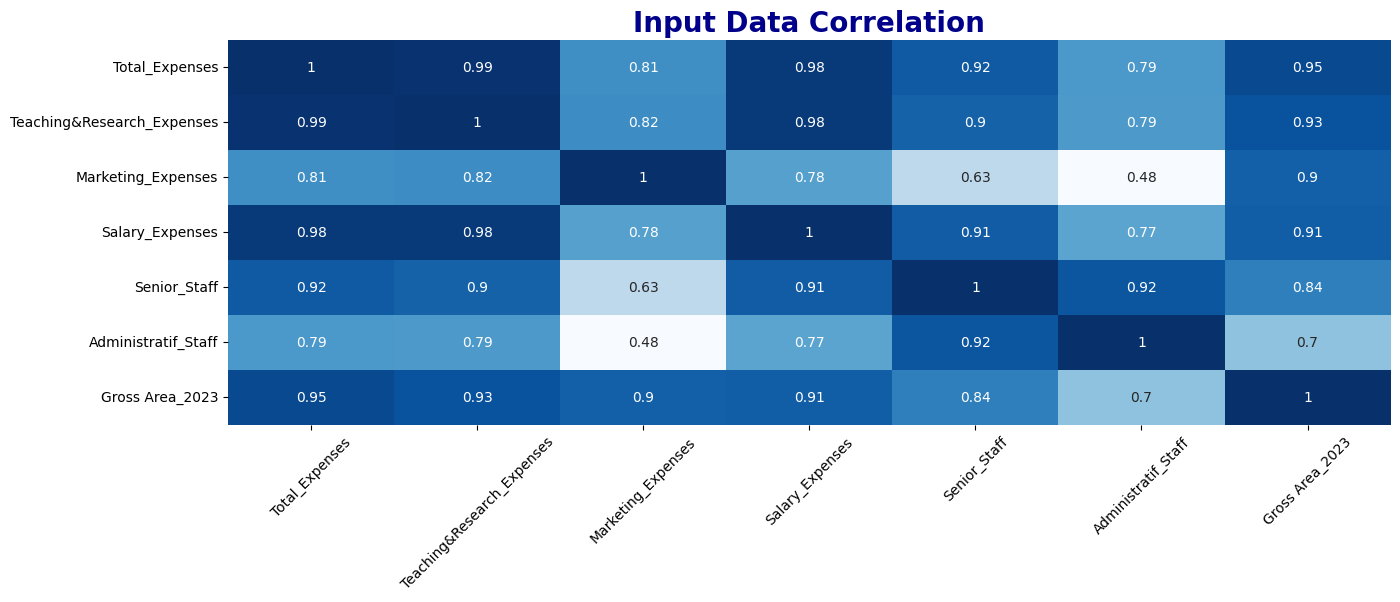

In [6]:
corr_data = input_data.drop(['Institution_YearCode', 'Year', 'Institution_Code'], axis = 1)
plt.figure(figsize = (15, 5))
sns.heatmap(corr_data.corr(), annot = True, cbar = False, cmap = 'Blues')
plt.title('Input Data Correlation', fontsize = 20, fontweight = 'bold', color = 'darkblue')
plt.xticks(rotation = 45)
plt.show()

## Outputs

In [7]:
# Students
student_data = data[['Institution_YearCode', 'Year', 'Students']]
# Incomes
income_data = data_expense(column_name = 'Incomes', expanse_code = 5)
# Publications & Citations
mention = pd.read_excel('Data.xlsx', sheet_name = 'OpenAlex_Data').drop(['InstitutionOpenAlex_ID', 'Site_code'], axis = 1)
# Alumni ?

outputs_data = student_data.copy()
outputs_data = pd.merge(outputs_data, income_data, on = ['Institution_YearCode', 'Year'], how = 'inner')
outputs_data = pd.merge(outputs_data, mention, on = ['Institution_YearCode'], how = 'inner')
print(outputs_data.shape)
outputs_data.head()


(32, 6)


,Institution_YearCode,Year,Students,Incomes,Publications Count,Citations Count
0,712023,2023,1624,94545,51,751
1,12016,2016,20171,2967007,3653,200848
2,392023,2023,3089,200672,88,930
3,22016,2016,17918,1636738,3227,93364
4,872023,2023,3167,156728,115,3751


## Corraltion between Inputs & Ouputs data

**Interpretation of Input-Output Correlations**

To validate the influence of input variables on institutional performance, a correlation and p-value analysis was conducted between each input and output. All inputs show strong positive correlations with key outputs such as Students, Incomes, Publications Count, and Citations Count, with statistically significant p-values (p < 0.05). For instance, Total Expenses and Teaching & Research Expenses exhibit near-perfect correlations with all outputs (r > 0.90), confirming their importance in the DEA model. Even Administratif Staff and Gross Area show meaningful relationships with outputs, supporting their inclusion. These results validate the relevance of selected inputs and ensure their impact on efficiency measurements.

In [8]:
from scipy.stats import pearsonr
import pandas as pd

all_data = pd.merge(input_data, outputs_data, on = ['Institution_YearCode', 'Year'])

input_vars = ['Total_Expenses', 'Teaching&Research_Expenses', 'Marketing_Expenses', 
              'Salary_Expenses', 'Senior_Staff', 'Administratif_Staff', 'Gross Area_2023']

output_vars = ['Students', 'Incomes', 'Publications Count', 'Citations Count']


results = []
for input_var in input_vars:
    for output_var in output_vars:
        corr, p = pearsonr(all_data[input_var], all_data[output_var])
        if abs(corr) >= 0.70 and p < 0.05:
            results.append({
                'Input': input_var,
                'Output': output_var,
                'Correlation': round(corr, 2),
                'P-value': f"{p:.2e}"
            })

corr_dataframe = pd.DataFrame(results)
corr_dataframe

,Input,Output,Correlation,P-value
0,Total_Expenses,Students,0.92,6.77e-08
1,Total_Expenses,Incomes,1.00,1.90e-18
2,Total_Expenses,Publications Count,0.96,5.53e-10
3,Total_Expenses,Citations Count,0.96,3.35e-10
4,Teaching&Research_Expenses,Students,0.92,9.26e-08
5,Teaching&Research_Expenses,Incomes,0.99,4.88e-15
6,Teaching&Research_Expenses,Publications Count,0.97,2.18e-11
7,Teaching&Research_Expenses,Citations Count,0.97,1.08e-11
8,Marketing_Expenses,Incomes,0.84,1.18e-05
9,Marketing_Expenses,Publications Count,0.80,6.65e-05


## DEA On new Data